## SpaceX Falcon 9 First Stage Landing Prediction

### Exploartory Analysis 
Exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [7]:
# Read data
df=pd.read_csv('dataset_part_2.csv')
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


How does FlightNumber (indicating the continuous launch attempts) and Payload variables would affect the launch outcome.


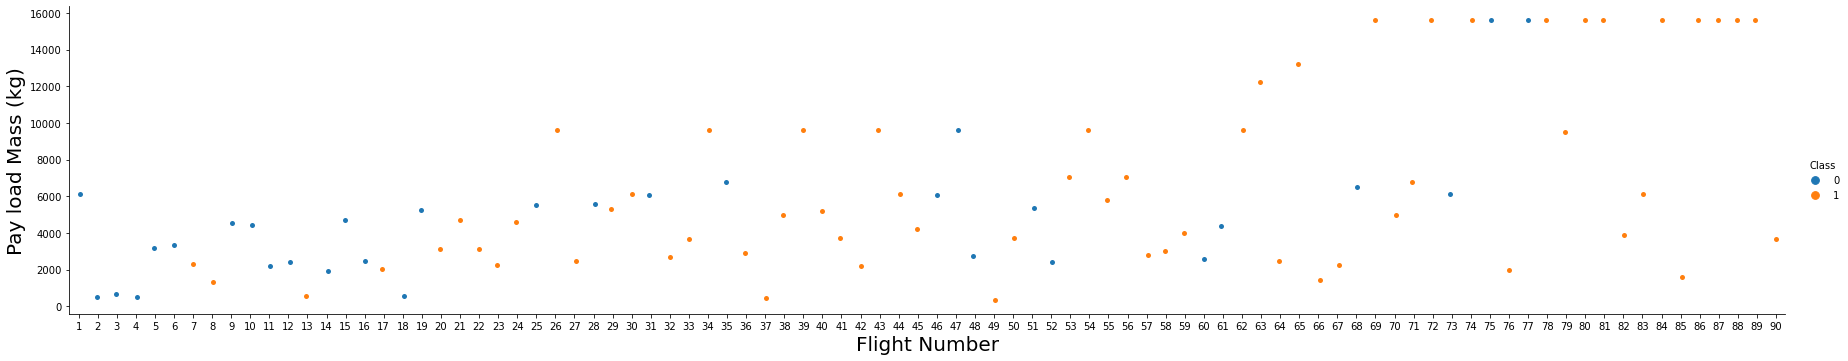

In [9]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

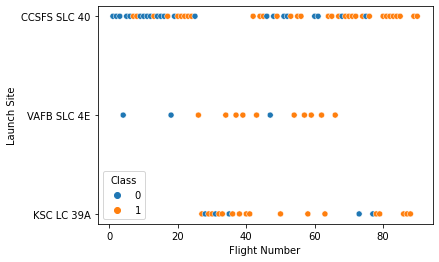

In [18]:
#relationship between Flight Number and Launch Site
sns.scatterplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df)
plt.ylabel("Launch Site",fontsize=10)
plt.xlabel("Flight Number",fontsize=10)
plt.show()

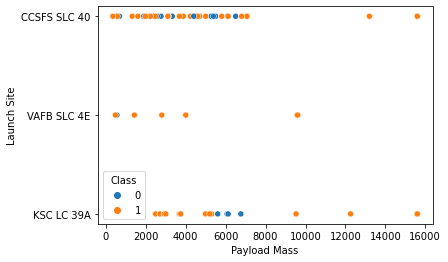

In [24]:
#relationship between Payload and Launch Site
sns.scatterplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df)
plt.ylabel("Launch Site",fontsize=10)
plt.xlabel("Payload Mass",fontsize=10)
plt.show()

Observation: for the VAFB-SLC launchsite there are no rockets launched for payload mass greater than 10000

<AxesSubplot:ylabel='Orbit'>

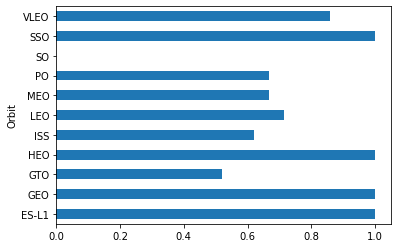

In [44]:
#success rate at each orbit
group = df.groupby('Orbit')['Class'].mean()
group.plot(kind='barh')

ES-L1, GEO, HEO and SSO has the highest success rate.

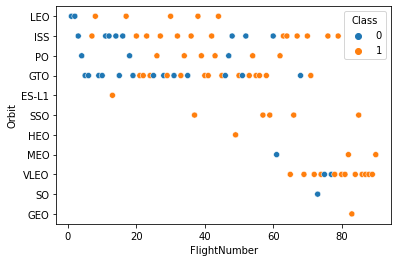

In [50]:
#relationship between FlightNumber and Orbit type
sns.scatterplot(y="Orbit", x="FlightNumber", hue="Class", data=df)
plt.xlabel("FlightNumber",fontsize=10)
plt.ylabel("Orbit",fontsize=10)
plt.show()

The LEO orbit Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

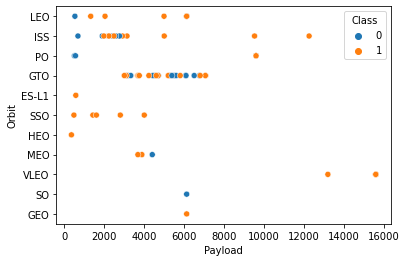

In [56]:
# relationship between Payload and Orbit type
sns.scatterplot(y="Orbit", x="PayloadMass", hue="Class", data=df)
plt.xlabel("Payload",fontsize=10)
plt.ylabel("Orbit",fontsize=10)
plt.show()

With heavy payloads the successful landing are more for PO, LEO and ISS. However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are present.

In [67]:
# Visualize the launch success yearly trend

In [11]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
year_df=df
year_df['Date'] = year
year_df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Text(0, 0.5, 'success rate')

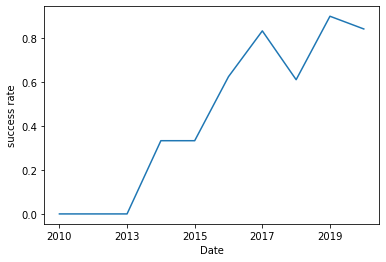

In [73]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
year_succes = df.groupby('Date')['Class'].mean()
year_succes.plot(kind='line')
plt.ylabel('success rate')

Since 2013 the success rate kept increasing till 2020

## Interactive Map

The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.

In [14]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

#### Mark all launch sites on a map

In [16]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = df[['LaunchSite', 'Latitude', 'Longitude', 'Class']]
launch_sites_df = spacex_df.groupby(['LaunchSite'], as_index=False).first()
launch_sites_df = launch_sites_df[['LaunchSite', 'Latitude', 'Longitude']]
launch_sites_df

,LaunchSite,Latitude,Longitude
0,CCSFS SLC 40,28.561857,-80.577366
1,KSC LC 39A,28.608058,-80.603956
2,VAFB SLC 4E,34.632093,-120.610829


In [18]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [20]:
coordinate = launch_sites_df[['Latitude','Longitude']].values.tolist()
coordinate

[[28.5618571, -80.577366], [28.6080585, -80.6039558], [34.632093, -120.610829]]

In [28]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
circle1=folium.Circle(coordinate[2], radius=1000, color='#d35400', fill=True).add_child(folium.Popup('VAFB SLC-4E'))
circle2=folium.Circle(coordinate[0], radius=1000, color='#d35400', fill=True).add_child(folium.Popup('CCAFS SLC-40'))
circle3=folium.Circle(coordinate[1], radius=1000, color='#d35400', fill=True).add_child(folium.Popup('KSC LC-39A'))
marker1=folium.map.Marker(coordinate[2], icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'VAFB SLC-4E', ))
marker2=folium.map.Marker(coordinate[0], icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'CCAFS SLC-40', ))
marker3=folium.map.Marker(coordinate[1], icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'KSC LC-39A', ))
site_map.add_child(circle1)
site_map.add_child(circle2)
site_map.add_child(circle3)
site_map.add_child(marker1)
site_map.add_child(marker2)
site_map.add_child(marker3)

#### Mark the success/failed launches for each site on the map

Create markers for all launch records. If a launch was successful (class=1), then we use a green marker and if a launch was failed, we use a red marker (class=0)

In [30]:
marker_cluster = MarkerCluster()

In [ ]:
spacex_df['marker_color'] = spacex_df['Class'].apply(lambda x: 'Red' if x == 0 else 'Green')

In [48]:
spacex_df.head(5)

,LaunchSite,Latitude,Longitude,Class,marker_color
0,CCSFS SLC 40,28.561857,-80.577366,0,Red
1,CCSFS SLC 40,28.561857,-80.577366,0,Red
2,CCSFS SLC 40,28.561857,-80.577366,0,Red
3,VAFB SLC 4E,34.632093,-120.610829,0,Red
4,CCSFS SLC 40,28.561857,-80.577366,0,Red


In [50]:
site_map.add_child(marker_cluster)
for index, record in spacex_df.iterrows():
    marker = folium.Marker([record['Latitude'], record['Longitude']], icon=folium.Icon(color='white', icon_color=record['marker_color'] ))
    marker_cluster.add_child(marker)

site_map

### Features Engineering

Select the features that will be used in landingprediction

In [52]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [72]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Class']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Class
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003,0
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005,0
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007,0
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003,0
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004,0


In [74]:
#export features data
features.to_csv('features.csv', index=False)